In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
df = pd.concat([train,test])

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [4]:
#classifying columns into numeric variables and categorical variables
df_numeric = train[['Age','SibSp','Parch','Fare']]
df_categ = train[['Survived','Pclass','Sex','Embarked','Cabin','Ticket']]

# POV 1: Numeric Values

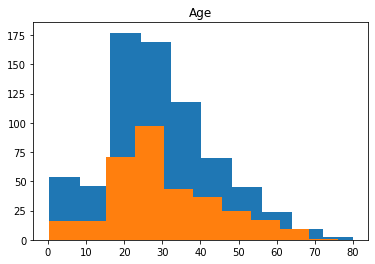

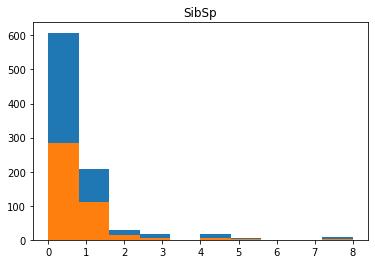

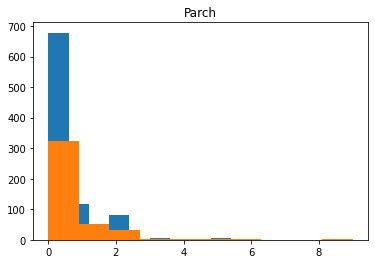

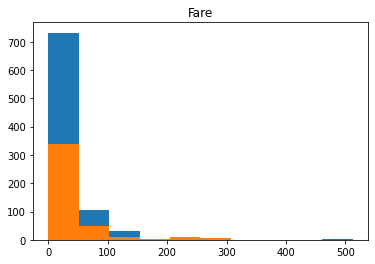

In [5]:
#plotting histograms for numeric values
for i in df_numeric: # // for i in ['Age','SibSp','Parch','Fare']:
    plt.hist(train[i]) #blue
    plt.hist(test[i]) #orange
    plt.title(i)
    plt.show()

In [6]:
#normalise the distributions that need it (not age, it is already pretty normalised)
#then create correlations between various numeric categories
print(df_numeric.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

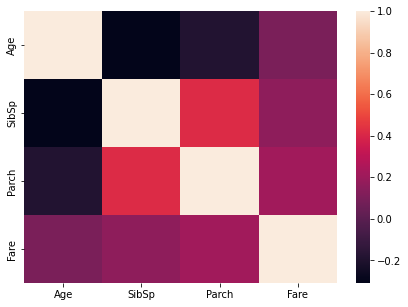

In [7]:
#use heatmap for better visualisation
plt.figure(figsize=(7,5))
sns.heatmap(df_numeric.corr())

In [8]:
#compare the stats in a table
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
#survival was more probable for the young, the rich(oof), the ones who have parents on board and the ones with no siblings

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# POV 2: Categorical Values

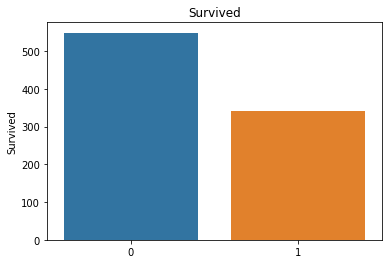

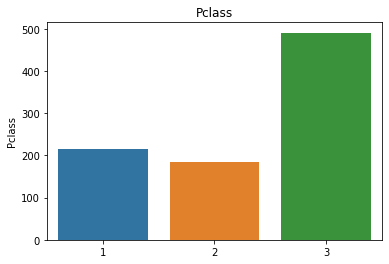

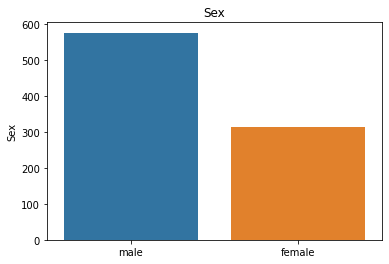

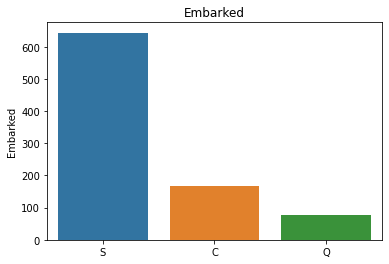

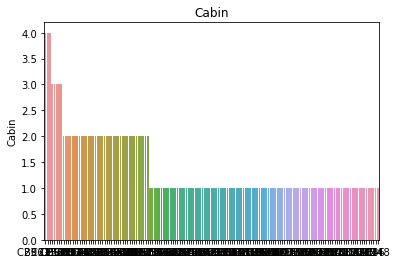

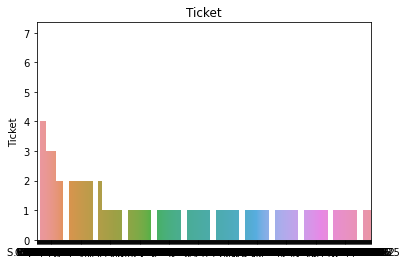

In [9]:
#We use bar graphs instead of histograms for a better/more appropriate view
for i in df_categ: # or ['Survived','Pclass','Sex','Embarked','Cabin','Ticket']
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i);
    plt.show();

In [10]:
#comparing stats in a table by categories
print(pd.pivot_table(train, index = 'Survived', columns = ['Pclass'] , values = 'Ticket', aggfunc = 'count'))
print() #blank line
print(pd.pivot_table(train, index = 'Survived', columns = ['Sex'] , values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = ['Embarked'] , values = 'Ticket', aggfunc = 'count'))
#counting cabin and ticket numbers is pointless so they are excluded

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [11]:
median_fare = train['Fare'].median()
test['Fare'].fillna(median_fare,inplace=True)


median_age_train = train['Age'].median()
median_age_test = train['Age'].median()
train['Age'].fillna(median_age_train,inplace=True)
test['Age'].fillna(median_age_test,inplace=True)
train.dropna(subset=['Embarked'],inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   889 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.2+ KB


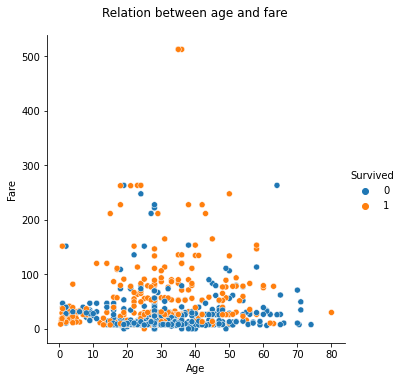

In [12]:
plot=sns.relplot(x='Age',y='Fare',data=train, hue='Survived')
plot.fig.suptitle('Relation between age and fare',y=1.05);

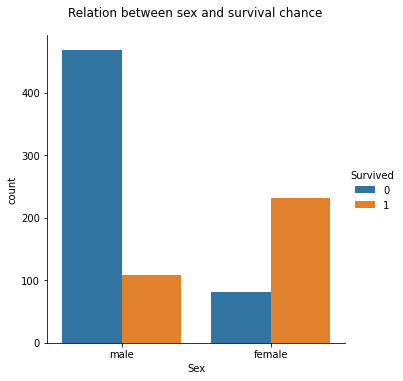

In [13]:
plot=sns.catplot(x='Sex',data=train, kind='count',hue='Survived')
plot.fig.suptitle('Relation between sex and survival chance', y=1.05);

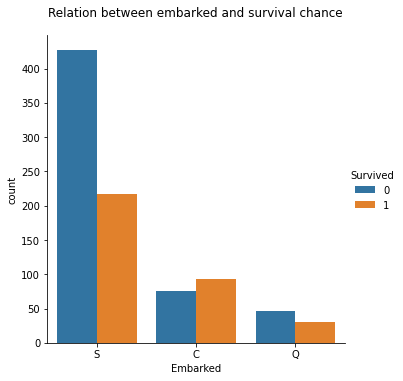

In [14]:
plot=sns.catplot(x='Embarked',data=train, kind='count',hue='Survived')
plot.fig.suptitle('Relation between embarked and survival chance', y=1.05);

In [15]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

y = train['Survived']

features = ['Sex','SibSp','Age','Fare','Embarked','Pclass']

X = pd.get_dummies(train[features])

X_test = pd.get_dummies(test[features])

# X_train, X_validate, y_train, y_validate = train_test_split(X, 
#                                                     y, 
#                                                     random_state=42)


model = GradientBoostingClassifier(random_state=42)
param_dist = {"max_depth": [4,5,6,7,8,9],
              "n_estimators": [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
         
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(model, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X, y)

# Make predictions on the test data
predictions = random_search.best_estimator_.predict(X_test)

# accuracy_score(y_validate, predictions)


output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
